In [7]:
import numpy as np
from embedding.array import ArrayEncoder
import matplotlib.pyplot as pl

def labs(k=2):
    return [str(n) for n in range(k)]


def make_array(length, k):
    return list(np.random.choice(labs(k), size=length, replace=True))


def sweep():
    for dim in range(100, 5000, 50):
        ae = ArrayEncoder(labels=labs(), dim=dim)

        for length in range(1, 100):
            a = make_array(length)
            v = ae.encode(a)

            try:
                b = ae.decode(v)
            except Exception as e:
                b = None

            success = np.all(a == b)
            if not success:
                print(dim, length, success)
                break


encoders = dict()


def stress(dim=500, length=10, k=2, n=1000):
    if (dim, k) in encoders:
        ae = encoders[(dim, k)]
    else:
        ae = ArrayEncoder(labels=labs(k), dim=dim, seed=None)
        encoders[(dim, k)] = ae
    good = 0
    bad = 0

    # T = ae.encoder.token_emb
    # A = ae.encoder.attr_emb[0]
    # M = T @ A @ T.T
    # M -= np.diag(np.diag(M))
    # N = T @ T.T
    # N -= np.diag(np.diag(N))
    # print(abs(M).max(), abs(N).max())
    for _ in range(n):
        a = make_array(length, k)
        v = ae.encode(a)

        try:
            b = ae.decode(v)

        except Exception as e:
            bad += 1
            continue
        if b is not None:
            success = np.all(a == b)
        else:
            success = False
        good += success
        bad += not success

    return good, bad, good / (good + bad)



In [17]:
dims = range(2000,40,-10)
lens = range(1,50)
N = 100
res = np.zeros((len(dims)*len(lens),4))
i = 0

for Z in dims:
    all_bad = 0
    for L in lens:
       g, b, _ = stress(Z,L,100,N)
       print(Z, L, g, b)
       res[i] = Z,L,g,b
       i += 1
       if g == 0:
           all_bad += 1
           if all_bad >5:
               break
               
res = res[:i]

2000 1 100 0
2000 2 100 0
2000 3 100 0
2000 4 100 0
2000 5 100 0
2000 6 100 0
2000 7 100 0
2000 8 100 0
2000 9 100 0
2000 10 100 0
2000 11 100 0
2000 12 100 0
2000 13 100 0
2000 14 100 0
2000 15 100 0
2000 16 100 0
2000 17 100 0
2000 18 100 0
2000 19 100 0
2000 20 100 0
2000 21 100 0
2000 22 100 0
2000 23 100 0
2000 24 100 0
2000 25 100 0
2000 26 100 0
2000 27 99 1
2000 28 100 0
2000 29 100 0
2000 30 100 0
2000 31 99 1
2000 32 99 1
2000 33 99 1
2000 34 100 0
2000 35 100 0
2000 36 98 2
2000 37 98 2
2000 38 100 0
2000 39 100 0
2000 40 95 5
2000 41 98 2
2000 42 97 3
2000 43 97 3
2000 44 96 4
2000 45 96 4
2000 46 95 5
2000 47 92 8
2000 48 88 12
2000 49 93 7
1990 1 100 0
1990 2 100 0
1990 3 100 0
1990 4 100 0
1990 5 100 0
1990 6 100 0
1990 7 100 0
1990 8 100 0
1990 9 100 0
1990 10 100 0
1990 11 100 0
1990 12 100 0
1990 13 100 0
1990 14 100 0
1990 15 100 0
1990 16 100 0
1990 17 100 0
1990 18 100 0
1990 19 100 0
1990 20 100 0
1990 21 100 0
1990 22 100 0
1990 23 100 0
1990 24 100 0
1990 25 100

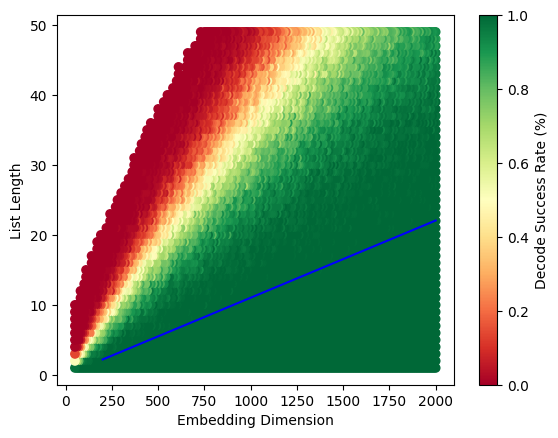

In [19]:
rr = res[res[:,3]!=0]
sl = min(rr[:,1]/rr[:,0])

pl.scatter(res[:,0],res[:,1], c=res[:,2]/(res[:,2]+res[:,3]), cmap='RdYlGn')
pl.colorbar().set_label('Decode Success Rate (%)')
pl.xlabel('Embedding Dimension')
pl.ylabel('List Length')

x_limits = pl.gca().get_xlim()
y_limits = pl.gca().get_ylim()
pl.plot((200,2000),
        (200*sl, 2000*sl), 
        color='#0000FF')
pl.xlim(x_limits)
pl.ylim(y_limits)
pl.savefig('rand_lists.png', dpi=300)


In [20]:
res.shape

(8299, 4)